In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np


import warnings

warnings.filterwarnings('ignore')

In [3]:

# PATH_IMAGENS = '../dataset/lamina/4_divisao_deixar_apenas_uma_imagem_por_campo_de_lamina_SEM_ERROS/Negativo/'
PATH_IMAGENS = '../dataset/lamina/4_divisao_deixar_apenas_uma_imagem_por_campo_de_lamina_SEM_ERROS/Positivo/'
PATH_MASK = '../dataset/labelMe/collection/masks-geral/'
PATH_INDIVIDUAL = '../dataset/labelMe/collection/masks-individual/'


In [4]:
from data_load import load_crop_images, load_crop_images_positiva

# dataset = load_crop_images_positiva(PATH_IMAGENS)

dataset = load_crop_images(PATH_IMAGENS,
                           PATH_MASK,
                           PATH_INDIVIDUAL) 

Total de Imagens:  78


100%|██████████| 78/78 [01:52<00:00,  1.44s/it]


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34192 entries, 0 to 34191
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   img     34192 non-null  object  
 1   mask    34192 non-null  object  
 2   img_id  34192 non-null  category
 3   label   34192 non-null  category
dtypes: category(2), object(2)
memory usage: 603.9+ KB


In [ ]:
dataset['label']

In [ ]:
print("Quantidade de recortes gerados: ", len(dataset))  # (34.192 128x128) # (12.016 256x256)

In [ ]:
from meanshift.plots import exibe2imagens

imgs_ = np.random.choice(dataset.index, 5)
for img_ in imgs_:
    exibe2imagens((dataset.loc[img_, 'img']), dataset.loc[img_, 'mask'])

Processando Mean Shift: 100%|██████████| 37953/37953 [1:24:15<00:00,  7.51it/s]  


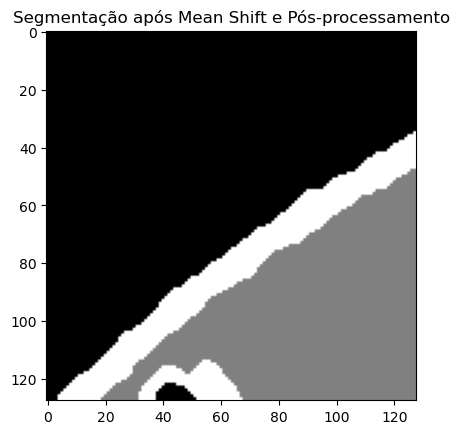

In [6]:

from matplotlib import pyplot as plt
from meanshift import aplicar_menshift_paralelo
from multiprocessing import Pool

pool = Pool(processes=200)
imagens_meanshift2 = aplicar_menshift_paralelo(dataset['img'])
pool.close()
pool.join()

# Exibição dos resultados
plt.figure()
plt.title('Segmentação após Mean Shift e Pós-processamento')
plt.imshow(imagens_meanshift2[0], cmap='gray')
plt.show()


In [ ]:
from validator import media_dice

media_dice(imagens_meanshift2, dataset['mask'])


In [7]:
from skimage.io import imsave

#save_imgs
path = 'dataset/meanshift/predictions/negativo/'

#create path
import os
if not os.path.exists(path):
    os.makedirs(path)

for i, img in enumerate(imagens_meanshift2):
    plt.imsave(f'{path}/{i}.png', img, cmap='gray')
    # plt.imsave(f'{path}/{i}_mask.png', dataset['mask'][i].reshape(128,128), cmap='gray')
    plt.imsave(f'{path}/{i}-orig.png', dataset['img'][i], cmap='gray')


In [ ]:
for img,mask in zip(imagens_meanshift2, dataset['mask']):
    plt.imsave(f'{path}/{i}-mask.png', mask, cmap='gray')

In [113]:
img_dataset = dataset['img'].copy()

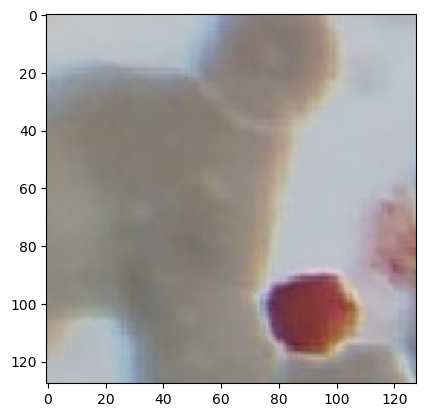

In [114]:
plt.imshow(img_dataset[200])

In [115]:
mask_copy = imagens_meanshift2.copy()

In [116]:
print(mask_copy[0].dtype)
print(img_dataset[0].dtype)

int64
float64


In [117]:
img_m = mask_copy[200].copy()
img_normal = img_dataset[200].copy()

In [118]:
img_normal[:,:, 0] *= img_m.astype(np.float64)
img_normal[:,:, 1] *= img_m.astype(np.float64)
img_normal[:,:, 2] *= img_m.astype(np.float64)

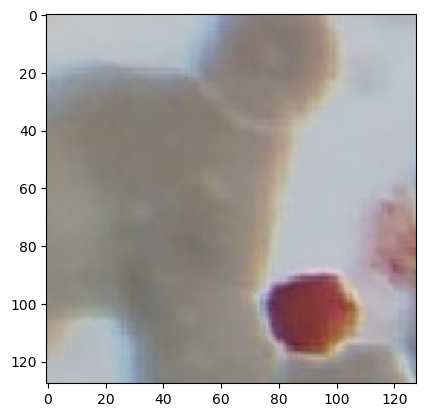

In [122]:
plt.imshow(img_dataset[200].copy(), cmap='gray')

In [105]:
#fechamento de buraco na mascara
from skimage.morphology import closing, square

img_m = closing(img_m, square(30))


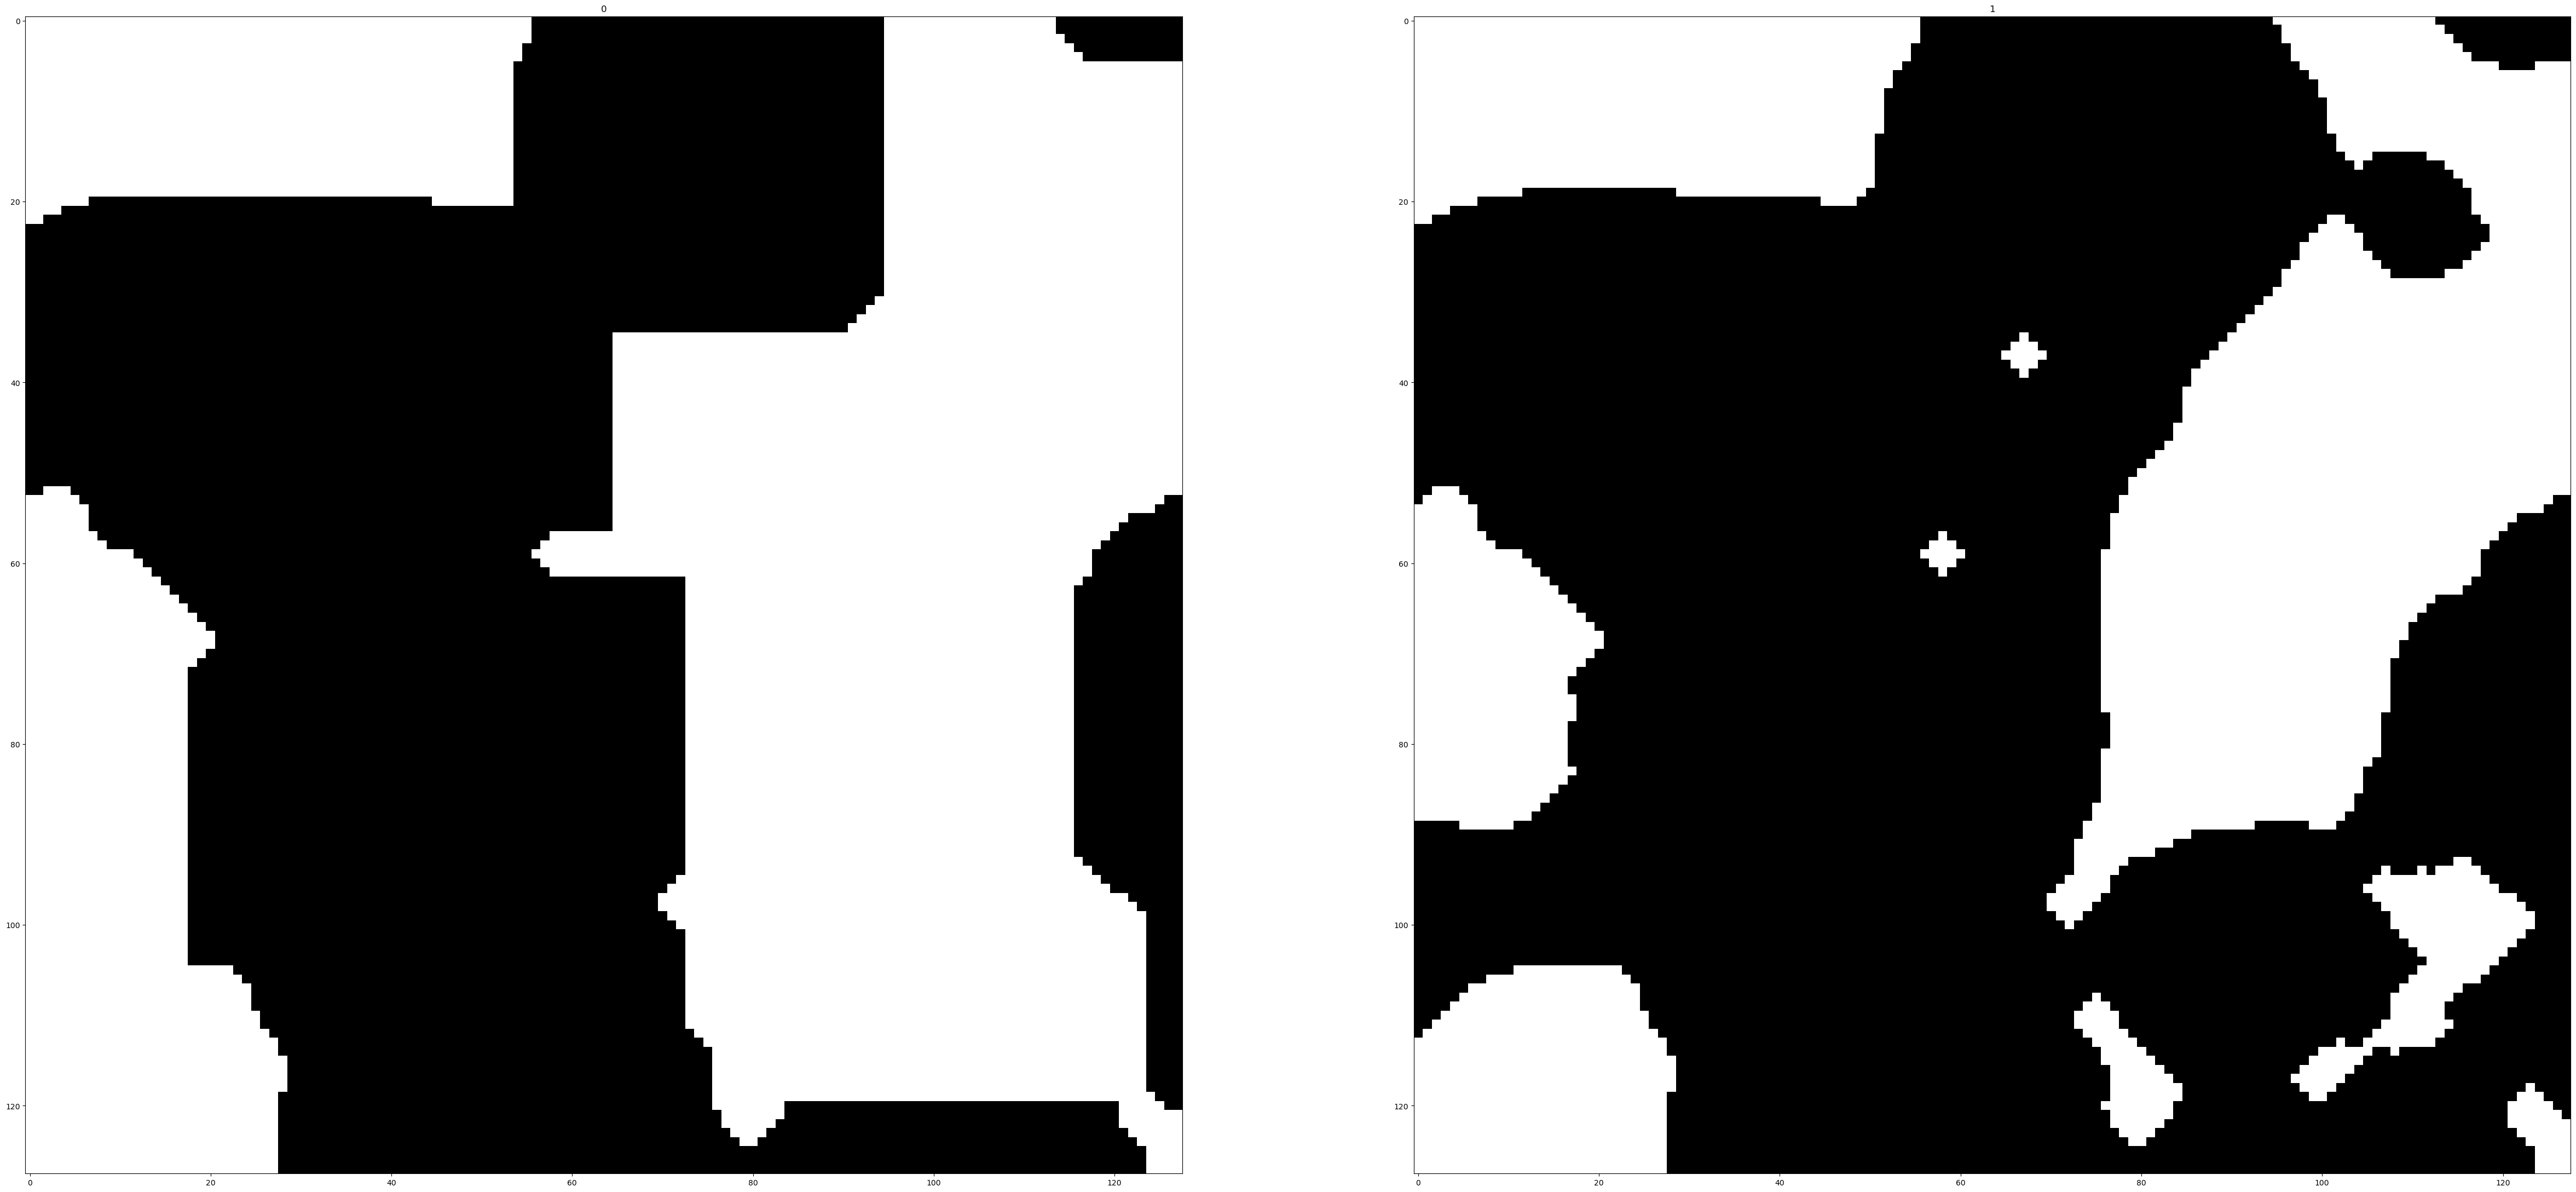

In [106]:
funcaoPlot([img_m, mask_copy[200]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


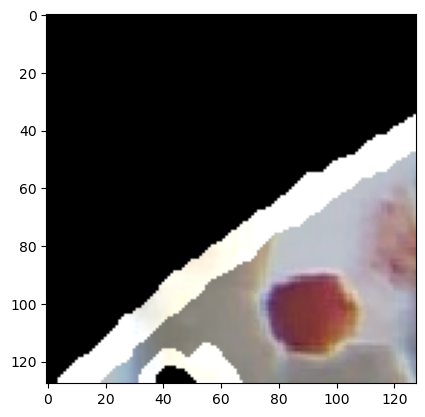

In [40]:
plt.imshow(img_gray, cmap='gray')

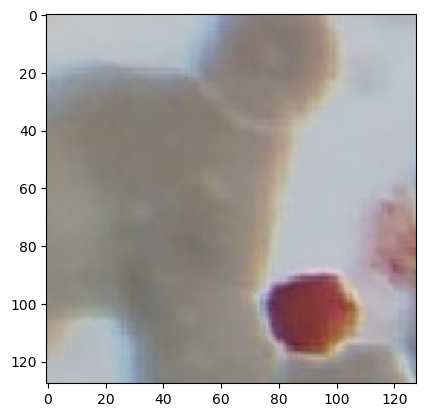

In [29]:
plt.imshow(img_gray), cmap='gray')

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

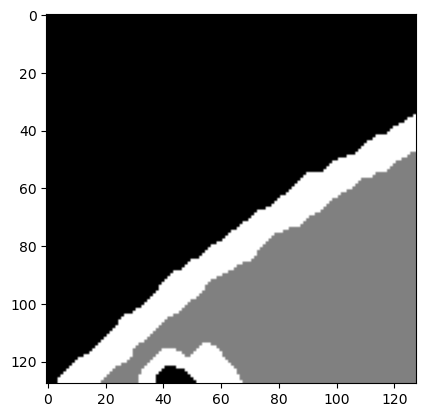

In [87]:
plt.imshow(imagens_meanshift2[0], cmap='gray')

In [81]:
#save imgs normal vezes a mascara

count = 0
for img,mask in zip(dataset['img'].copy(), imagens_meanshift2.copy()):
    float = mask.astype(np.float64)
    img[:,:, 0] *= float
    img[:,:, 1] *= float
    img[:,:, 2] *= float
    
    img_normalized = img.astype(np.uint8)
    
    plt.imsave(f'{path}/{count}-fusion.png', img_normalized, cmap='gray')
    count += 1
    

In [ ]:
img_gray.dtype
teste = teste.astype(np.float64)

In [ ]:
img_final = teste * img_gray

In [ ]:
img_final.astype(np.uint8)

In [7]:
path = 'dataset/meanshift/predictions/positivo/final/'
from matplotlib import pyplot as plt

#create path
import os
if not os.path.exists(path):
    os.makedirs(path)
    
for i, img in enumerate(dataset['img']):
    plt.imsave(f'{path}/{i}-orig.png', img, cmap='gray')


In [10]:
import numpy as np
import tensorflow as tf
from skimage.transform import resize

def preprocess_image(image, target_size=(128, 128)):
    # Redimensiona a imagem para o tamanho alvo
    image = resize(image, target_size, anti_aliasing=True)

    # Normaliza a imagem (exemplo: escala de 0 a 1)
    image = image / 255.0

    return image

# Preprocessa todas as imagens originais e segmentadas
processed_orig_images = np.array([preprocess_image(img) for img in dataset['img'][:10]])
processed_segmented_images = np.array([preprocess_image(img) for img in imagens_meanshift2][:10])

2024-01-12 07:38:53.009407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Verifica se as imagens estão em escala de cinza e as expande para terem 3 canais, se necessário
if processed_orig_images.ndim < 4:
    processed_orig_images = np.stack((processed_orig_images,)*3, axis=-1)

if processed_segmented_images.ndim < 4:
    processed_segmented_images = np.stack((processed_segmented_images,)*3, axis=-1)

# Combina as imagens
combined_images = np.concatenate((processed_orig_images, processed_segmented_images), axis=-1)


In [23]:
plt.imsave(combined_images[0], "teste.png")

UFuncTypeError: ufunc 'minimum' did not contain a loop with signature matching types (dtype('<U9'), dtype('<U9')) -> None

In [ ]:
plt.imshow(dataset['mask'][2], cmap='gray')

In [43]:
from plots import funcaoPlot

funcaoPlot([dataset['img'][0], dataset['mask'][0], imagens_meanshift2[0]])

KeyError: 'mask'

In [ ]:
funcaoPlot([dataset['img'][200], dataset['mask'][200], imagens_meanshift2[200]])

In [ ]:
funcaoPlot([dataset['img'][2000], dataset['mask'][2000], imagens_meanshift2[2000]])

In [ ]:
funcaoPlot([dataset['img'][20000], dataset['mask'][20000], imagens_meanshift2[20000]])